In [1]:
library(titanic)
library(Amelia)
library(dplyr)
library(e1071)
library(ggplot2)
library(gridExtra)

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




## Câu 1

In [2]:
head(titanic_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [3]:
tail(titanic_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [4]:
str(titanic_train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [5]:
summary(titanic_train)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

## Câu 2

In [6]:
cols = c('Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked')
titanic_sub = titanic_train[, cols]

print(paste("cols:", ncol(titanic_sub)))
print(paste("rows:", nrow(titanic_sub)))

[1] "cols: 8"
[1] "rows: 891"


## Câu 3

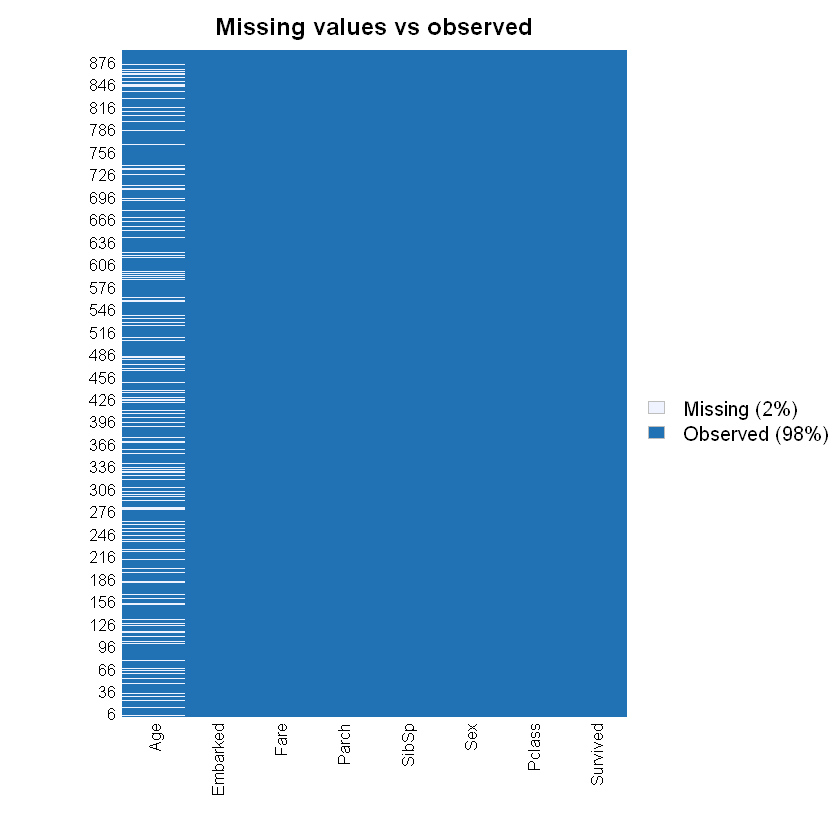

In [7]:
# Check missing value
missmap(titanic_sub, main = "Missing values vs observed")

In [8]:
# Drop NA
print(paste("Before drop:", nrow(titanic_sub)))
titanic_sub = na.omit(titanic_sub)
print(paste("After drop", nrow(titanic_sub)))

[1] "Before drop: 891"
[1] "After drop 714"


## Câu 4

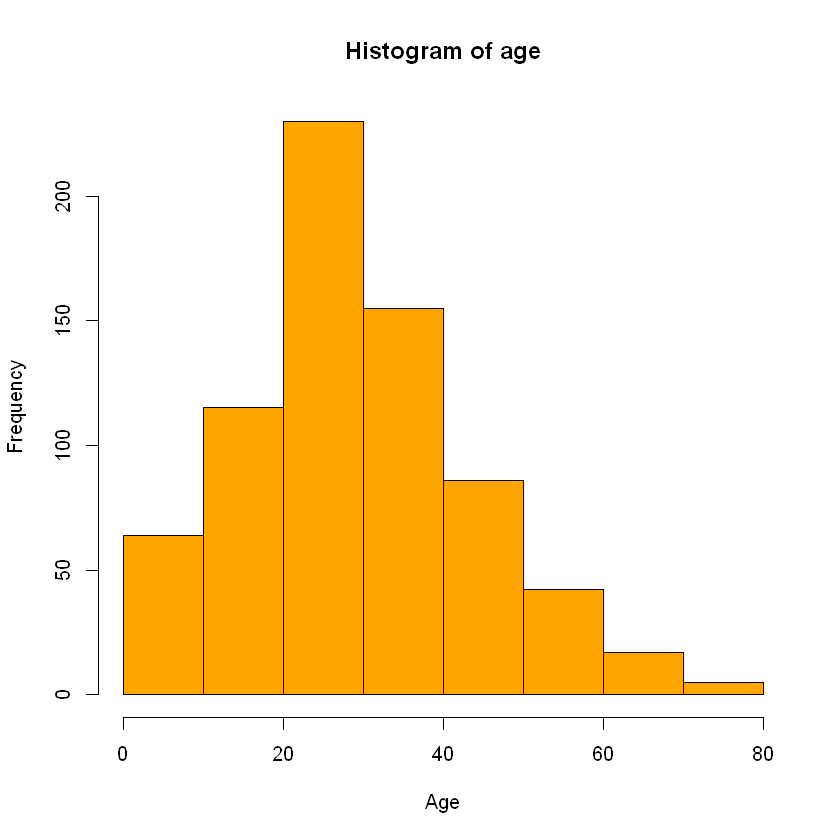

In [9]:
hist(titanic_sub$Age, main = "Histogram of age", xlab = "Age", col = "orange")

### Nhận xét:
* Hành khác phần lớn dưới 60 tuổi
* Khách từ 20-30 chiếm nhiều nhất

## Câu 5

In [10]:
getmode = function(v){
    uniqv = unique(v)
    uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [11]:
print(paste("Mean of Knowledge Age:", mean(titanic_sub$Age)))
print(paste("Median of Knowledge Age:", median(titanic_sub$Age)))
print(paste("Mode of Knowledge Age:", getmode(titanic_sub$Age)))
print(paste("Max of Knowledge Age:", max(titanic_sub$Age)))
print(paste("Min of Knowledge Age:", min(titanic_sub$Age)))
print(paste("Range of Knowledge Age:", range(titanic_sub$Age)[2] - range(titanic_sub$Age)[1]))

[1] "Mean of Knowledge Age: 29.6991176470588"
[1] "Median of Knowledge Age: 28"
[1] "Mode of Knowledge Age: 24"
[1] "Max of Knowledge Age: 80"
[1] "Min of Knowledge Age: 0.42"
[1] "Range of Knowledge Age: 79.58"


In [12]:
print(paste("Mean of Knowledge Fare:", mean(titanic_sub$Fare)))
print(paste("Median of Knowledge Fare:", median(titanic_sub$Fare)))
print(paste("Mode of Knowledge Fare:", getmode(titanic_sub$Fare)))
print(paste("Max of Knowledge Fare:", max(titanic_sub$Fare)))
print(paste("Min of Knowledge Fare:", min(titanic_sub$Fare)))
print(paste("Range of Knowledge Fare:", range(titanic_sub$Fare)[2] - range(titanic_sub$Fare)[1]))

[1] "Mean of Knowledge Fare: 34.6945140056022"
[1] "Median of Knowledge Fare: 15.7417"
[1] "Mode of Knowledge Fare: 13"
[1] "Max of Knowledge Fare: 512.3292"
[1] "Min of Knowledge Fare: 0"
[1] "Range of Knowledge Fare: 512.3292"


## Câu 6

In [13]:
quan = quantile(titanic_sub$Fare, c(0.05, 0.3, 0.6, 0.95))
quan

5%       30%       60%       95% 
  7.22500   9.19503  26.00000 120.00000

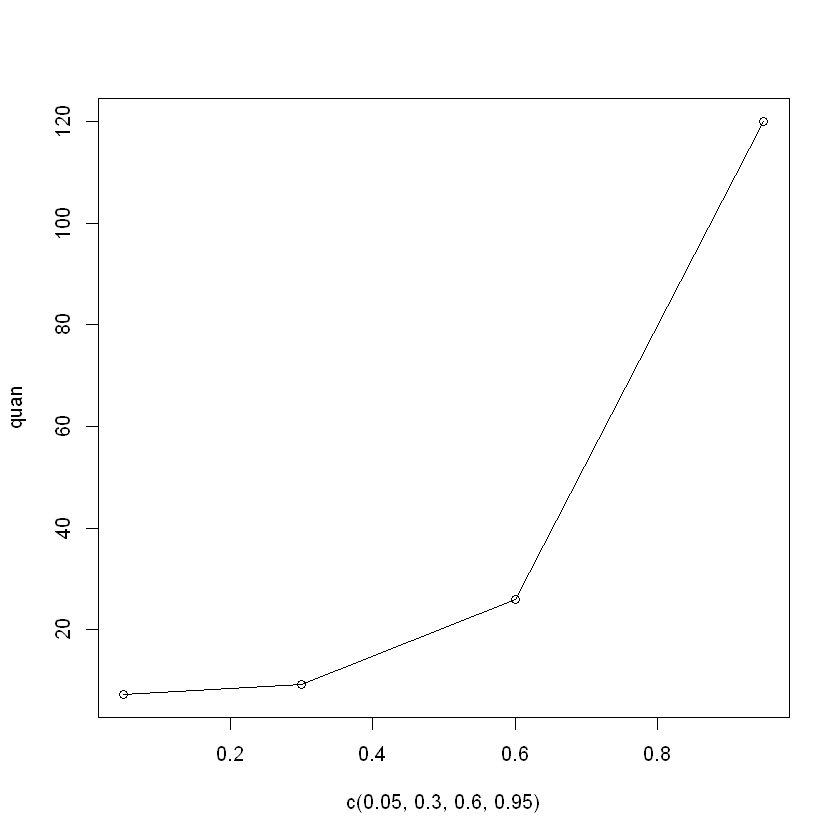

In [14]:
plot(c(0.05, 0.3, 0.6, 0.95), quan, type = "o")

## Câu 7

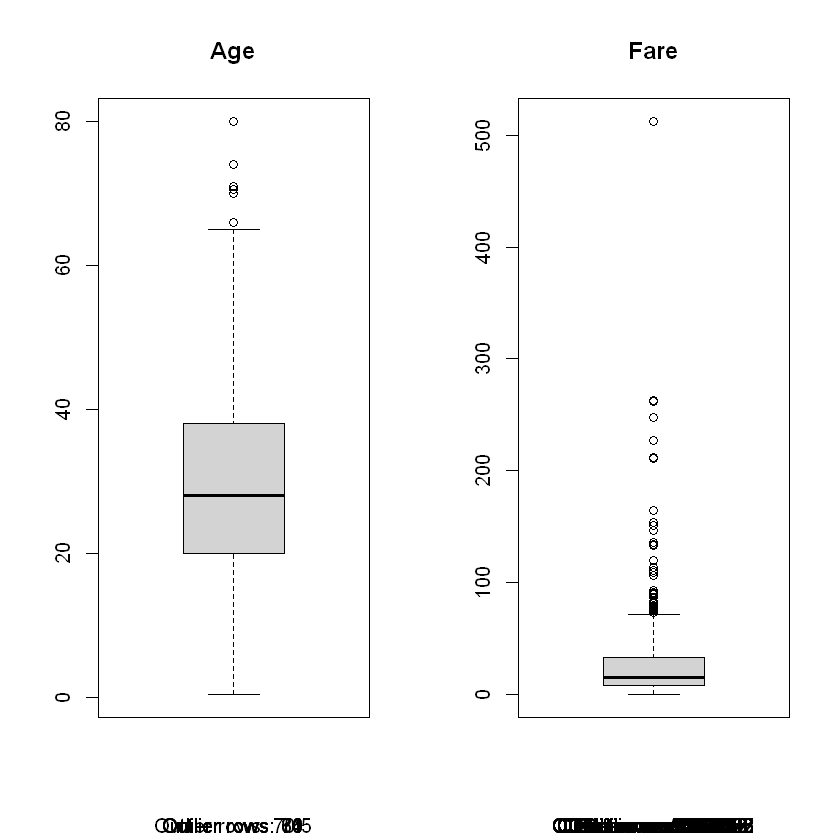

In [15]:
# Boxplot to Check for outliers
par(mfrow = c(1, 2)) # Divide graph area in 2 columns
boxplot(titanic_sub$Age, main = "Age", 
        sub = paste("Outlier rows:", boxplot.stats(titanic_sub$Age)$out))
boxplot(titanic_sub$Fare, main = "Fare", 
        sub = paste("Outlier rows:", boxplot.stats(titanic_sub$Fare)$out))

In [16]:
print("age_outliers:")
length(boxplot.stats(titanic_sub$Age)$out)
print("fare_outliers:")
length(boxplot.stats(titanic_sub$Fare)$out)

[1] "age_outliers:"


[1] 8

[1] "fare_outliers:"


[1] 94

## Câu 8

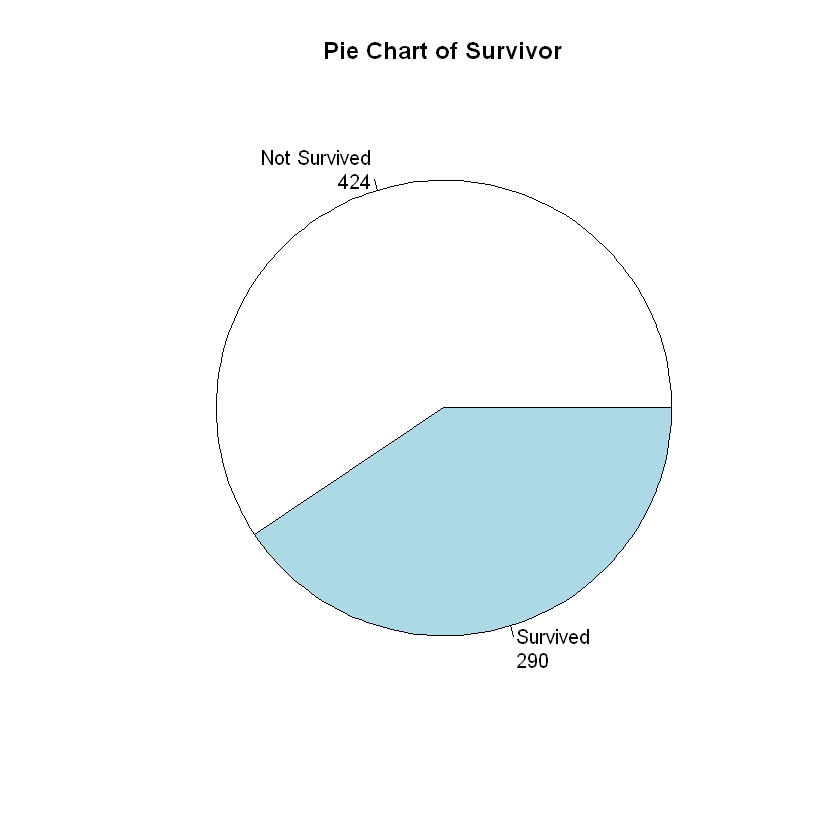

In [17]:
survive_table <- table(titanic_sub$Survived)
lbls <- paste(ifelse(names(survive_table) == "1", "Survived", "Not Survived"), "\n", survive_table, sep="")
pie(survive_table, labels = lbls,
   main="Pie Chart of Survivor")

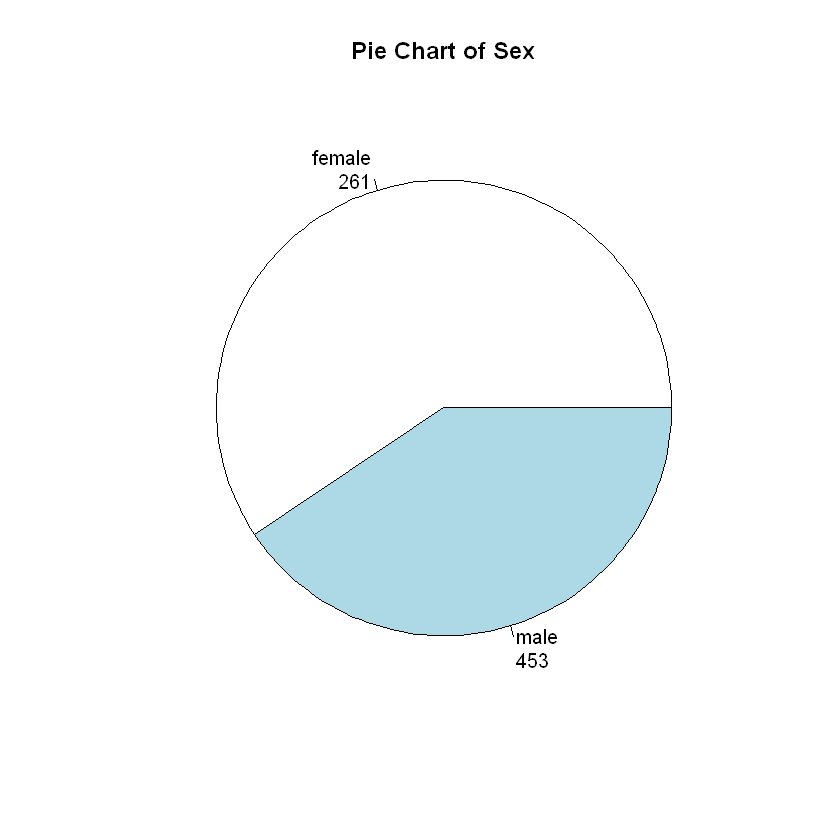

In [18]:
sex_table <- table(titanic_sub$Sex)
lbls <- paste(names(sex_table), "\n", sex_table, sep="")
pie(survive_table, labels = lbls,
   main="Pie Chart of Sex")

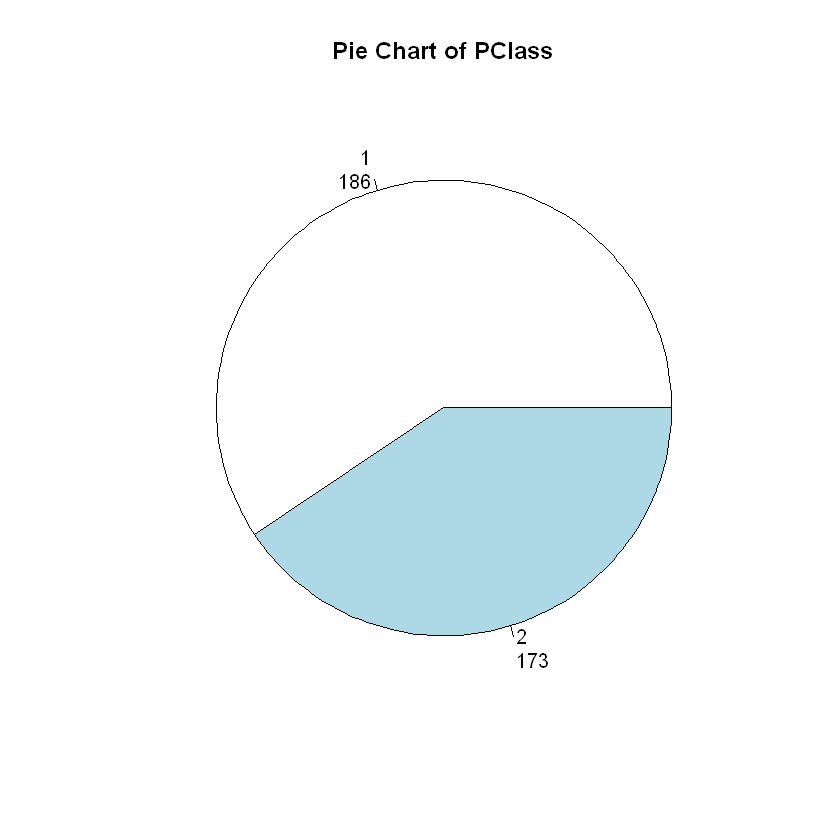

In [19]:
pclass_table <- table(titanic_sub$Pclass)
lbls <- paste(names(pclass_table), "\n", pclass_table, sep="")
pie(survive_table, labels = lbls,
   main="Pie Chart of PClass")

## Câu 9

In [20]:
numerical_cols = colnames(select_if(titanic_sub, is.numeric))
for(col in numerical_cols){
    print(paste(col, "Variance:", var(titanic_sub[, col])))
}

[1] "Survived Variance: 0.241532798252541"
[1] "Pclass Variance: 0.702662832313851"
[1] "Age Variance: 211.019124746308"
[1] "SibSp Variance: 0.864497271559395"
[1] "Parch Variance: 0.728102741797982"
[1] "Fare Variance: 2800.41309969518"


## Câu 10

In [21]:
for(col in numerical_cols){
    print(paste(col,"STD:",sd(titanic_sub[, col])))
}

[1] "Survived STD: 0.491459864335371"
[1] "Pclass STD: 0.838249862698379"
[1] "Age STD: 14.526497332334"
[1] "SibSp STD: 0.929783454122192"
[1] "Parch STD: 0.85328936580622"
[1] "Fare STD: 52.9189295025436"


## Câu 11

In [22]:
for(col in numerical_cols){
    print(paste(col,"skewness:",skewness(titanic_sub[, col])))
}

[1] "Survived skewness: 0.381337792544514"
[1] "Pclass skewness: -0.466576511082864"
[1] "Age skewness: 0.387474402175984"
[1] "SibSp skewness: 2.50900018939665"
[1] "Parch skewness: 2.60792042314416"
[1] "Fare skewness: 4.63409555588894"


In [23]:
print("Nhan xet")
for(col in numerical_cols){
    print(paste(col,ifelse(skewness(titanic_sub[, col]) < 0, "phan phoi lech trai", "phan phoi lech phai")))
}

[1] "Nhan xet"
[1] "Survived phan phoi lech phai"
[1] "Pclass phan phoi lech trai"
[1] "Age phan phoi lech phai"
[1] "SibSp phan phoi lech phai"
[1] "Parch phan phoi lech phai"
[1] "Fare phan phoi lech phai"


## Câu 12

In [24]:
for(col in numerical_cols){
    print(paste(col,"kurtosis:",kurtosis(titanic_sub[, col])))
}

[1] "Survived kurtosis: -1.85717669382422"
[1] "Pclass kurtosis: -1.42245668289167"
[1] "Age kurtosis: 0.159767055046588"
[1] "SibSp kurtosis: 6.95936532527223"
[1] "Parch kurtosis: 8.74987659402051"
[1] "Fare kurtosis: 30.6053943519167"


## Câu 13

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



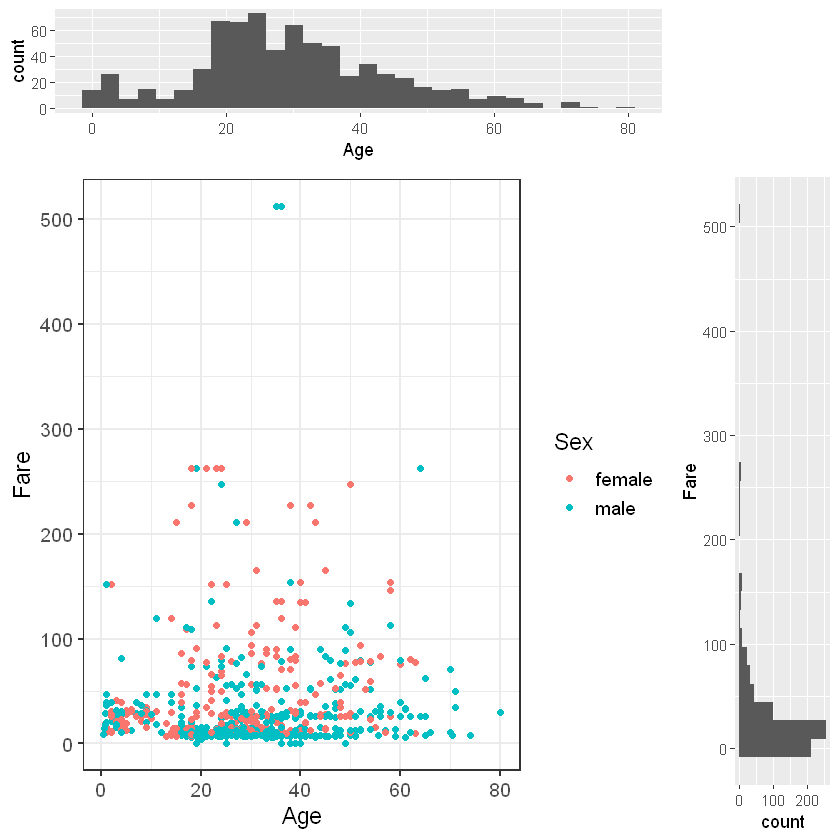

In [25]:
hist_top <- ggplot(data = titanic_sub, aes(x = Age))+geom_histogram()
hist_right <- ggplot(data = titanic_sub, aes(x = Fare))+geom_histogram()+coord_flip()
scatter = ggplot(data = titanic_sub, aes(x = Age, y = Fare, fill = Sex, col = Sex)) + geom_point() + theme_bw(base_size = 14)

empty <- ggplot()+geom_point(aes(1,1), colour="white")+
         theme(axis.ticks=element_blank(), 
               panel.background=element_blank(), 
               axis.text.x=element_blank(), axis.text.y=element_blank(),           
               axis.title.x=element_blank(), axis.title.y=element_blank())
grid.arrange(hist_top, empty, scatter, hist_right, ncol=2, nrow=2, widths=c(4, 1), heights=c(1, 4))


### Nhận xét
* Độ tuổi chủ yếu từ 20 đến 40
* Giá vé phần lớn dưới 50

## Câu 14

In [27]:
print(paste("covariance:", cov(titanic_sub$Age, titanic_sub$Fare)))
print(paste("correlation:", cor(titanic_sub$Age, titanic_sub$Fare)))

[1] "covariance: 73.8490298146193"
[1] "correlation: 0.0960666917690389"


### Nhận xét:
Age và Fare không tương quan

## Câu 15

In [34]:
Fare50 = nrow(filter(titanic_sub,  Fare >= 50))
print(paste("Fare >= 50 row count:",Fare50))

[1] "Fare >= 50 row count: 138"


In [35]:
1 - pbinom(25, 50, 0.5)

[1] 0.4438624